## Predicting the cost of health insurance for a person

Project 1 in Linear Regression


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns


## Bring in Dataset


In [2]:
df= pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=416&path=medical_insurance_cost.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analyze data

In [3]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# check for duplicates, found 1
df.duplicated().sum()

np.int64(1)

In [8]:
# see name of duplicated row
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
# confirm both rows are duplicates
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
# drop duplicates
df = df.drop_duplicates()

In [11]:
# confirm we no longer have duplicates
df.duplicated().sum()

np.int64(0)

In [12]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [13]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [14]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

## Split into train dataset and test dataset

You want to do this early so our data does not get contaminated

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# split our dataset to a train and a test set, random state a lot of people like to use 42
train_df, test_df = train_test_split(df, random_state=42)

In [17]:
train_df

,age,sex,bmi,children,smoker,region,charges
763,27,male,26.03,0,no,northeast,3070.8087
1079,63,male,33.66,3,no,southeast,15161.5344
178,46,female,28.90,2,no,southwest,8823.2790
287,63,female,26.22,0,no,northwest,14256.1928
1290,38,female,19.95,2,no,northeast,7133.9025
...,...,...,...,...,...,...,...
1096,51,female,34.96,2,yes,northeast,44641.1974
1131,27,male,45.90,2,no,southwest,3693.4280
1295,20,male,22.00,1,no,southwest,1964.7800
861,38,female,28.00,3,no,southwest,7151.0920


## Working with our training set

In [18]:
# take our train_df and assign to a get dummies version
train_df = pd.get_dummies(train_df, drop_first=True)

train_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
763,27,26.03,0,3070.8087,True,False,False,False,False
1079,63,33.66,3,15161.5344,True,False,False,True,False
178,46,28.90,2,8823.2790,False,False,False,False,True
287,63,26.22,0,14256.1928,False,False,True,False,False
1290,38,19.95,2,7133.9025,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1096,51,34.96,2,44641.1974,False,True,False,False,False
1131,27,45.90,2,3693.4280,True,False,False,False,True
1295,20,22.00,1,1964.7800,True,False,False,False,True
861,38,28.00,3,7151.0920,False,False,False,False,True


In [19]:
# No null values
train_df.isna().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [20]:
# drop charges as this is what we are wanting to find and compare against
X_train = train_df.drop(columns=['charges'])

y_train = train_df['charges']

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linreg_model = LinearRegression()

linreg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
train_preds = linreg_model.predict(X_train)

In [24]:
train_preds

array([ 3834.25112721, 15803.21400858,  9928.00254575, ...,
         787.46258779,  8202.27897271,  9146.33522348], shape=(1002,))

In [25]:
y_train

763      3070.8087
1079    15161.5344
178      8823.2790
287     14256.1928
1290     7133.9025
           ...    
1096    44641.1974
1131     3693.4280
1295     1964.7800
861      7151.0920
1127     5836.5204
Name: charges, Length: 1002, dtype: float64

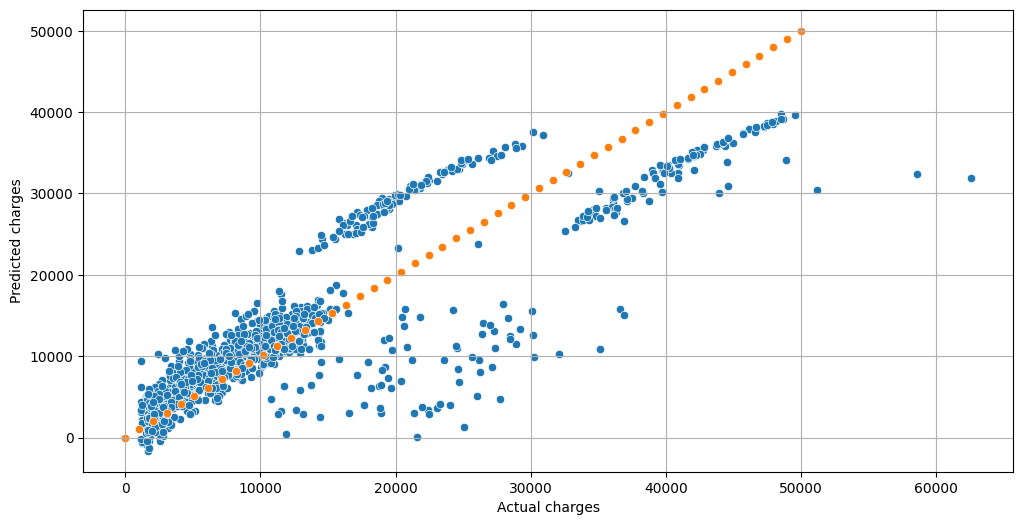

In [26]:
# scatterplot for the predictions vs actual values
plt.figure(figsize=(12, 6))
sns.scatterplot(x = y_train, y = train_preds)

# orange line is what we are hoping for
sns.scatterplot(x=np.linspace(0, 50000), y=np.linspace(0, 50000))

plt.xlabel("Actual charges")
plt.ylabel('Predicted charges')

plt.grid()

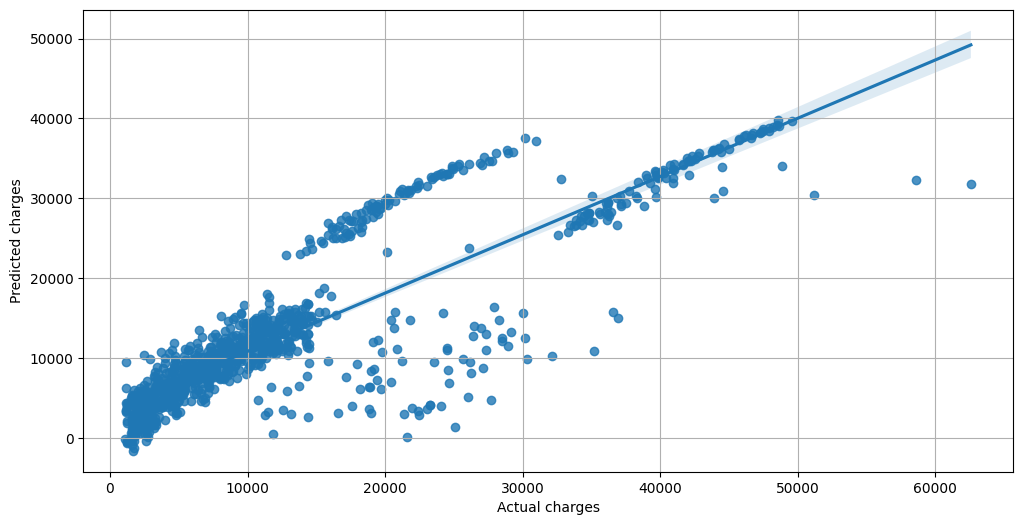

In [27]:
# regplot - plots the regression line that predicts the difference between actual charges and predicted charges
plt.figure(figsize=(12, 6))
sns.regplot(x = y_train, y = train_preds)

# orange line is what we are hoping for
# sns.scatterplot(x=np.linspace(0, 50000), y=np.linspace(0, 50000))

plt.xlabel("Actual charges")
plt.ylabel('Predicted charges')

plt.grid()

In [28]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [29]:
print('ON THE TRAINING DATASET:')
print(f'Mean Ablsolute error: {round(mean_absolute_error(y_true = y_train, y_pred = train_preds))}')
print(f'Root Mean Squared error: {round(root_mean_squared_error(y_true = y_train, y_pred = train_preds))}')
print(f'R^2 score: {round(r2_score(y_true = y_train, y_pred = train_preds), 4)}')

ON THE TRAINING DATASET:
Mean Ablsolute error: 4208
Root Mean Squared error: 6098
R^2 score: 0.7297


In [30]:
train_residuals = train_preds - y_train

train_residuals

763      763.442427
1079     641.679609
178     1104.723546
287    -1954.001941
1290   -1486.120294
           ...     
1096   -7882.755961
1131    7021.851016
1295   -1177.317412
861     1051.186973
1127    3309.814823
Name: charges, Length: 1002, dtype: float64

<Axes: xlabel='charges', ylabel='Count'>

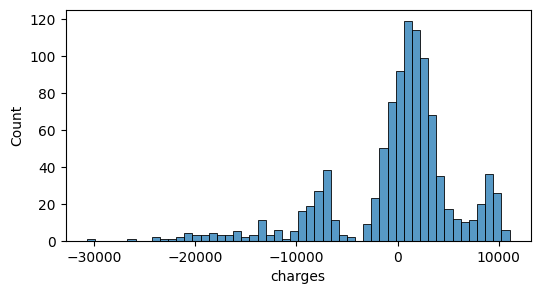

In [31]:
# we can see it is close to a normal distribution
plt.figure(figsize=(6, 3))
sns.histplot(x=train_residuals)

In [32]:
# reseting index of our residuals
temp_residuals = train_residuals.reset_index(drop=True)

<Axes: xlabel='None', ylabel='charges'>

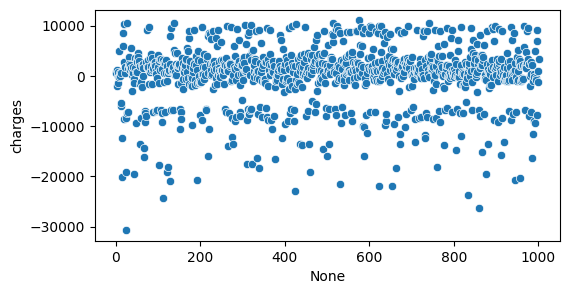

In [33]:
# our residuals/errors have the same gap long our mid point
plt.figure(figsize=(6, 3))
sns.scatterplot(x = temp_residuals.index, y = temp_residuals)


sns.scatterplot(x = y_train, y = temp_residuals)

Text(0, 0.5, 'Residuals of preditions')

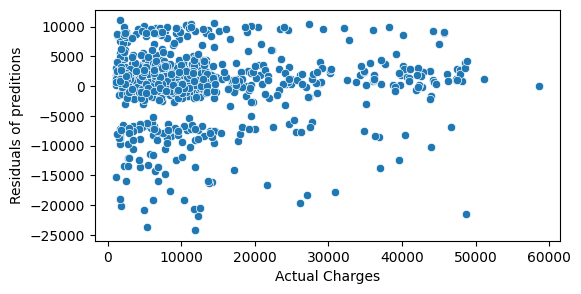

In [34]:
# This is more of what we want
plt.figure(figsize=(6, 3))
sns.scatterplot(x = y_train, y = temp_residuals)
plt.xlabel('Actual Charges')
plt.ylabel('Residuals of preditions')

## Let's do the same thing with our test data

In [35]:
# One-hot encode TEST
X_test = pd.get_dummies(test_df.drop(columns=['charges']), drop_first=True)

y_test = test_df['charges']

In [36]:
# MAKE test columns match train columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [37]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
763,27,26.03,0,True,False,False,False,False
1079,63,33.66,3,True,False,False,True,False
178,46,28.90,2,False,False,False,False,True
287,63,26.22,0,False,False,True,False,False
1290,38,19.95,2,False,False,False,False,False


In [38]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
900,49,22.515,0,True,False,False,False,False
1064,29,25.600,4,False,False,False,False,True
1256,51,36.385,3,False,False,True,False,False
298,31,34.390,3,True,True,True,False,False
237,31,38.390,2,True,False,False,True,False


In [39]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
900,49,22.515,0,True,False,False,False,False
1064,29,25.600,4,False,False,False,False,True
1256,51,36.385,3,False,False,True,False,False
298,31,34.390,3,True,True,True,False,False
237,31,38.390,2,True,False,False,True,False
...,...,...,...,...,...,...,...,...
1014,38,27.600,0,False,False,False,False,True
669,40,29.810,1,False,False,False,True,False
1109,45,20.350,3,True,False,False,True,False
788,29,22.515,3,True,False,False,False,False


In [40]:
test_preds = linreg_model.predict(X_test)

Text(0, 0.5, 'Predicted charges (test dataset)')

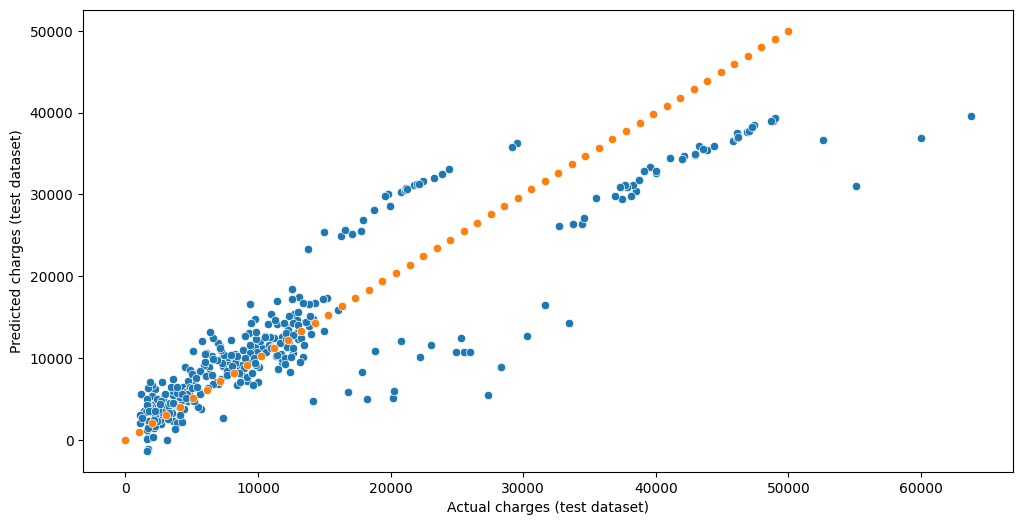

In [41]:
# scatterplot for the predictions vs actual values
plt.figure(figsize=(12, 6))
sns.scatterplot(x = y_test, y = test_preds)

# orange line is what we are hoping for
sns.scatterplot(x=np.linspace(0, 50000), y=np.linspace(0, 50000))

plt.xlabel("Actual charges (test dataset)")
plt.ylabel('Predicted charges (test dataset)')

In [42]:
print('ON THE TESTING DATASET:')
print(f'Mean Ablsolute error: {round(mean_absolute_error(y_true = y_test, y_pred = test_preds))}')
print(f'Root Mean Squared error: {round(root_mean_squared_error(y_true = y_test, y_pred = test_preds))}')
print(f'R^2 score: {round(r2_score(y_true = y_test, y_pred = test_preds), 4)}')




ON THE TESTING DATASET:
Mean Ablsolute error: 4069
Root Mean Squared error: 5940
R^2 score: 0.7959


In [43]:
test_residuals = test_preds - y_test

<Axes: xlabel='charges', ylabel='Count'>

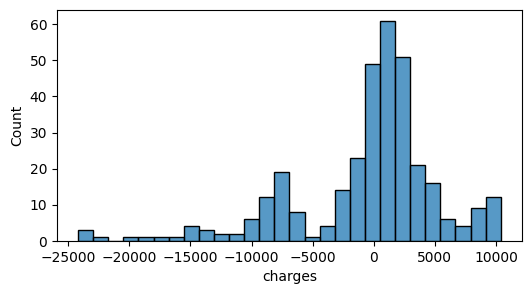

In [44]:
plt.figure(figsize=(6, 3))
sns.histplot(x=test_residuals)  

Text(0, 0.5, 'Predicted residuals')

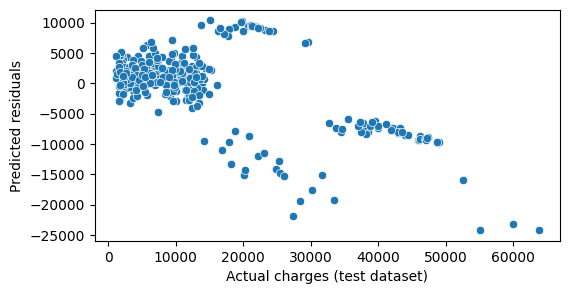

In [45]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x = y_test, y = test_residuals)

plt.xlabel("Actual charges (test dataset)")
plt.ylabel('Predicted residuals')